# Procesando imágenes con nunpy

In [1]:
import matplotlib as plt
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import urllib.request 
from PIL import Image

# para usar fondo oscuro
plt.style.use("dark_background")

<br><br><br>
### Creamos un array desde una imagen de internet

In [38]:
url = 'https://www.arqhys.com/wp-content/uploads/2017/03/tipos-de-paisaje-natural.jpg'
internet_image = Image.open(urllib.request.urlopen(url))

In [39]:
#transformamos la imagen en un array
#preparamos 3 arrays por separado para usarlos más adelante
#en distintos casos

image1 = np.array(internet_image)
image2 = np.array(internet_image)
image3 = np.array(internet_image)

<br><br><br>
### Explorando

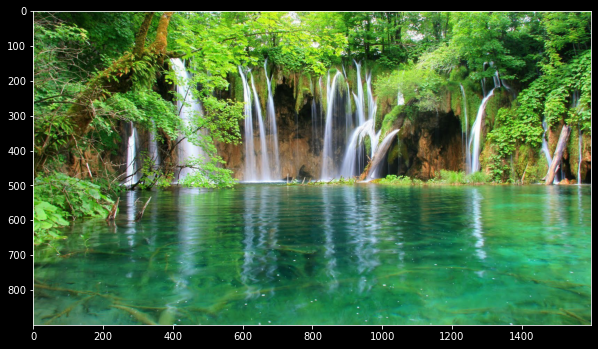

In [19]:
#vemos como luce la imagen
plt.figure(figsize=(10,20))
plt.imshow(image1)


In [5]:
# veamos la forma
print (image1.shape)
900 * 1600 * 3

(900, 1600, 3)


4320000

In [6]:
#veamos el tamaño total
print (image1.size)

4320000


In [10]:
print (np.amin(image1), np.amax(image1))

0 255


In [7]:
print("Fila Completa")
print (image1[150]) #imprimo una fila
print("_____________________")
print("")

Fila Completa
[[ 59 103  50]
 [ 55  93  42]
 [ 43  71  22]
 ...
 [ 56 133  19]
 [ 20  90   0]
 [ 16  79   0]]
_____________________



In [8]:
print("Columna completa")
print (image1[:, 150]) #imprimo una columna
print("_____________________")

Columna completa
[[ 17  37  10]
 [ 16  39  10]
 [ 18  42  10]
 ...
 [ 86 143 110]
 [ 86 143 110]
 [ 86 143 110]]
_____________________


In [13]:
print("")
print("3 Colores de un pixel")
print (image1[150,150]) #imprimo los tres colores de un pixel
print("_____________________")


3 Colores de un pixel
[113 132 104]
_____________________


In [14]:

print("")
print("El valor de un color")
print (image1[150,150,2]) #imprimo el rojo de un pixel


El valor de un color
104


<br><br><br>
### Modificando

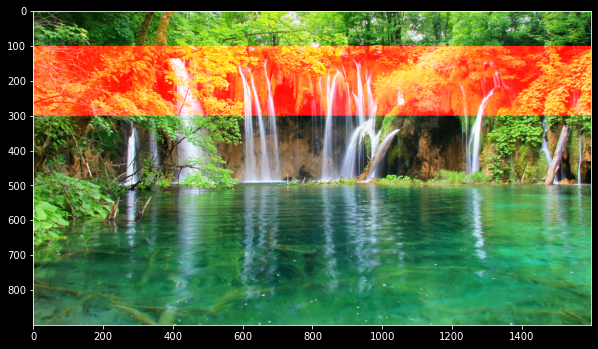

In [20]:
#seleccionamos las filas de 100 a 300, todas las columnas, colo rojo y lo llevamos a su máximo valor
image2[100:300 , : , 0] = 255
#image2[400:500 , : , 1] = 255
#image2[700:800 , 100:1000, 2] = 255
plt.figure(figsize=(10,20))
plt.imshow(image2)

In [40]:
# creamos un filtro que selecciona todos los pixeles menores a 50
# esto me creará una matriz booleana del mismo tamaño que la foto
# a donde en cada pixel que sea <50 habrá un true

filtro = image3 > 150
print(filtro.shape)
print (image3.shape)


(900, 1600, 3)
(900, 1600, 3)


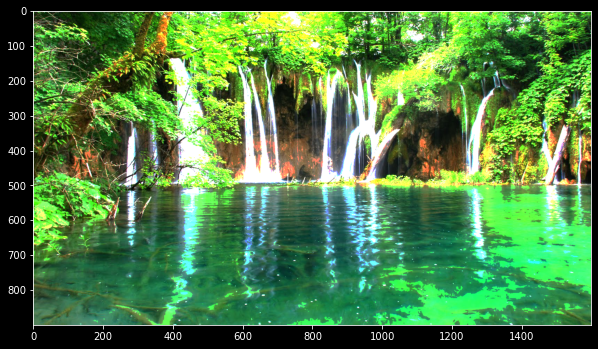

In [41]:
# aplicamos el filtro poniendo en 0 todos esos pixeles
image3[filtro] = 255
plt.figure(figsize=(10,20))
plt.imshow(image3)

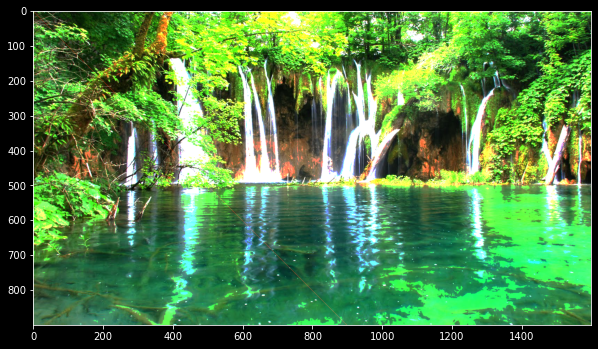

In [42]:
array_a = np.array(range(900))
array_b = np.array(range(900))
image3[array_a,array_b,0] = 255
plt.figure(figsize=(10,20))
plt.imshow(image3)

<br><br><br>
### Crearemos una máscara circular
https://docs.scipy.org/doc/numpy/reference/generated/numpy.ogrid.html


<img src="https://craftingeek.me/wp-content/uploads/2014/07/b-como-hacer-circulos-con-hilo.gif" >




In [43]:
total_rows, total_cols, total_layers = image1.shape
X, Y = np.ogrid[:total_rows, :total_cols] 
print("X = ", X.shape, "and Y = ", Y.shape)



Y



X =  (900, 1) and Y =  (1, 1600)


array([[   0,    1,    2, ..., 1597, 1598, 1599]])

In [5]:
# calculamos el índice de la columna y fila central 
center_row, center_col = total_rows / 2, total_cols / 2
print("Fila Central = ", center_row," Columna Central = ", center_col)

Fila Central =  450.0  Columna Central =  800.0


In [6]:
# calculamos las distancias al centro y las ponemos en una matriz
dist_from_center = (X - center_row)**2 + (Y - center_col)**2

print("\n▽ Matriz que contiene las distancias al centro ▽\n")
print(dist_from_center)

print(np.amax(dist_from_center))



▽ Matriz que contiene las distancias al centro ▽

[[842500. 840901. 839304. ... 837709. 839304. 840901.]
 [841601. 840002. 838405. ... 836810. 838405. 840002.]
 [840704. 839105. 837508. ... 835913. 837508. 839105.]
 ...
 [839809. 838210. 836613. ... 835018. 836613. 838210.]
 [840704. 839105. 837508. ... 835913. 837508. 839105.]
 [841601. 840002. 838405. ... 836810. 838405. 840002.]]
842500.0


In [10]:
# calculamos el tamaño del radio deseado
radius = (total_rows / 2.5)**2
print("\nEl radio es ► ", radius)


El radio es ►  202500.0


In [11]:
# creamos una máscara circular
circular_mask = (dist_from_center > radius)
print(circular_mask.shape)
print(circular_mask[300:600,600:1000])
print(circular_mask)

(900, 1600)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


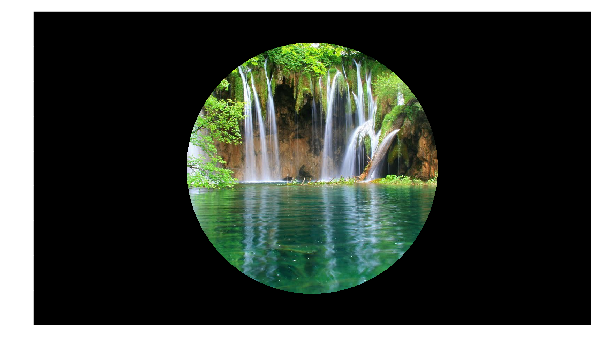

In [12]:
# aplicamos la máscara a la foto
image1[circular_mask] = 0
plt.figure(figsize=(10,20))
plt.imshow(image1) 



<br><br><br><h2 style="color:#6699ff">FILTRO DE COLOR</h2>

▽ Imagen Original ▽ 
▽ Máscara Verde ▽ 
[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


<Figure size 720x1440 with 0 Axes>

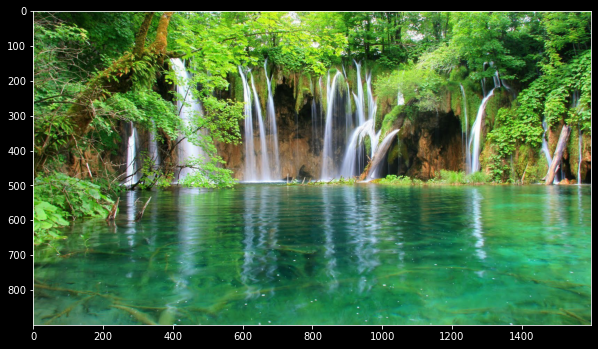

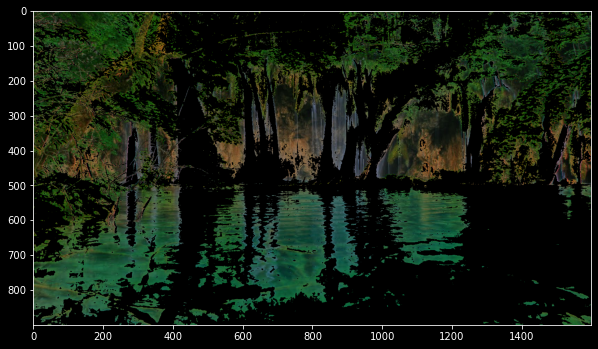

In [44]:
url = 'https://www.arqhys.com/wp-content/uploads/2017/03/tipos-de-paisaje-natural.jpg'
internet_image = Image.open(urllib.request.urlopen(url))
image = np.array(internet_image)
plt.figure(figsize=(10,20))
print("▽ Imagen Original ▽ ")
plt.figure(figsize=(10,20))
plt.imshow(image)

#Creamos una máscara que tomará valor true, donde existan valores mayores a 115 en Verde
green_mask = image[:,:,1]>115
print("▽ Máscara Verde ▽ ")
print(green_mask)

#operaremos sobre los píxeles a donde hay verdes intensos

image[green_mask,0]=0
image[green_mask,1]=0
image[green_mask,2]=0

print (image[green_mask])
plt.figure(figsize=(10,20))
plt.imshow(image)